
## PROJECT : COVID-19 Statewise Live Status
---------------------------------------------------------------

1. <b>Business Problem</b>

   During this pandemic, almost every organization referring COVID-19 government data to plan out their business activities and    also to come out with guidelines for their employees over work from home and re-opening of the workplace. Thus, by              considering the importance of government statistics and time of managerial level staff who are involved in planning out          business activities and making guidelines, the COVID-19 Statewise Status project is made to save manual efforts to some          extent and make the required data available on the execution of written code at a single place in tabular as well as            graphical forms. 



2. <b>Data</b>

   * Data is available in its tabular form which needs to be extracted to meet the outcome of the business problem
   * Data Souce(s) : <code>Ministry of Health and Family Welfare</code> government website : https://www.mohfw.gov.in/




3. <b>Methodology</b>

   Here Web Scraping is used to extract the live COVID-19 statewise status data from "Ministry of Health and Family Welfare"        website and apply Data Visualization to transform the extracted data into its graphical forms,i.e. Bar and Pie plots.



4. <b>Results</b>

   * IBM India Pvt Ltd is a huge organization which is spread across different states in India viz. Gurguaon, Noida, Delhi,          Ahmedabad, Pune, Mumbai, Kolkata, Bhubaneswar, Bengaluru, Hyderabad, Chennai, Coimbatore and as per its Wikipedia page,          approx 3,50,000 employees are working here so I believe it is going to be benefited to all these number of employees and        specially those who are more into preparing advisories and guidelines. 

   * It will reduce their efforts of seeking COVID-19 data as the authenticated government data is directly available at one          place and that too in different forms like tabular, bar plot, pie percentage plot and counts of cases which further results      in freeing up the involved resources and their utilization in some other constructive work as well as time consumption.




5. <b>Discussions</b>
   
   Rounds of discussions were held for recommendations, alterations and more with several project managers to ultimately meet      the business requirements. 



6. <b>Conclusion</b>

   This project can be effectively used in the organization until COVID-19 so that the organization could take maximum benefit      out of it in order to come out with business plans with ease.


In [3]:
import requests     
import lxml.html as lh  
import pandas as pd

Note : Module(s)/Library/Package(s) import part

1. Requests module is used to send all kinds of HTTP requests.
2. lxml library is written for parsing XML and HTML documents very quickly.
3. pandas is a Python package providing fast, flexible, and expressive data structures designed to make working with structured    (tabular, multidimensional, potentially heterogeneous) and time series data both easy and intuitive.

In [4]:
url='https://www.mohfw.gov.in/'

#Create a handle, page, to handle the contents of the website
page = requests.get(url)

#Store the contents of the website under doc
doc = lh.fromstring(page.content)

#Parse data that are stored between <tr>..</tr> of HTML
tr_elements = doc.xpath('//tr')

Note : Request URL and Parsing part

1. requests.get to retrieve the web page with our data.
2. Parse data using the html module and save the results in doc.
3. We need to use page.content rather than page.text because html.fromstring implicitly expects bytes as input.
4. HTML string can be easily parsed with the help of fromstring() function.
5. doc now contains the whole HTML file in a nice tree structure which we can go over two different ways: XPath and CSSSelect.
6. XPath is a way of locating information in structured documents such as HTML or XML documents.
7. XPath can be used to navigate through elements and attributes in an XML document.
8. XPath uses path expressions to select nodes or node-sets in an XML document.

In [5]:
#Check the length of the first 12 rows
[len(T) for T in tr_elements[:12]]

[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]

Note : Checking number of columns in each row

1. List Comprehension method is used here.
2. It avoids mutiple lines of codes.

In [6]:
#Create empty list
col = []

#Indexing for header columns name 
i = 0

#For each row, store each first element (header) and an empty list
for t in tr_elements[0]:
    i += 1
    name = t.text_content()
    print('{} : {}'.format(i,name))
    col.append((name,[]))

1 : S. No.
2 : Name of State / UT
3 : Active Cases*
4 : Cured/Discharged/Migrated*
5 : Deaths**
6 : Total Confirmed cases*


Note : Web Scraping Part - I (for very first row)

1. text_content() method returns the text content of the tag (and the text in any children).
2. Instead of concatenating strings using '+' operator we can use .format() function as well.
3. It is a good way to format objects into your strings for print statements is with the string's .format() method.
4. append() method add the elements at the end of the list. 

In [7]:
#Since out first row is the header, data is stored on the second row onwards
for j in range(1,len(tr_elements)):
    
    #T is our j'th row
    T = tr_elements[j]
    
    #If row is not of size 6, the //tr data is not from our table 
    if len(T) != 6:
        break
    
  
    #i is the index of our column
    i = 0
    
    #Iterate through each element of the row
    for t in T.iterchildren():
        data = t.text_content() 
        #Check if row is empty
        if i > 0:
        #Convert any numerical value to integers
            try:
                data = int(data)
            except:
                pass
        #Append the data to the empty list of the i'th column
        col[i][1].append(data)
        #Increment i for the next column
        i+=1

Note : Web Scraping Part - II (Get each value from every row)

1. iterchildren(self, tag=None, reversed=False, *tags)
2. iterchildren() method is used to iterate over the children of this element.
3. As opposed to using normal iteration on this element, the returned elements can be reversed with the 'reversed' keyword and      restricted to find only elements with a specific tag
4. col[i][1].append(data), here fixed integer 1 is used as in col list at index 1 empty list is there to add the extracted          values.

In [8]:
#Checking length of each coulumn
[len(C) for (title,C) in col]

[36, 36, 36, 36, 36, 36]

In [9]:
Dict = { title:column for (title,column) in col }
df = pd.DataFrame(Dict)

Note : Creation of DataFrame by loading a dataset, i.e. Dictionary

1. Pandas DataFrame is two-dimensional size-mutable, potentially heterogeneous tabular data structure with labeled axes (rows      and columns).
2. Pandas DataFrame consists of three principal components, the data, rows, and columns.
3. A Pandas DataFrame will be created by loading the datasets from existing storage, storage can be SQL Database, CSV file, and    Excel file. Pandas DataFrame can be created from the lists, dictionary, and from a list of dictionary etc.

In [10]:
df.head(36)

,S. No.,Name of State / UT,Active Cases*,Cured/Discharged/Migrated*,Deaths**,Total Confirmed cases*
0,1,Andaman and Nicobar Islands,114,176,0,290
1,2,Andhra Pradesh,44431,43255,985,88671
2,3,Arunachal Pradesh,695,428,3,1126
3,4,Assam,7954,23055,77,31086
4,5,Bihar,12317,24053,234,36604
5,6,Chandigarh,284,555,13,852
6,7,Chhattisgarh,2365,4683,39,7087
7,8,Dadra and Nagar Haveli and Daman and Diu,328,530,2,860
8,9,Delhi,12657,113068,3806,129531
9,10,Goa,1606,3047,33,4686


Note : Display a DataFrame/extracted data

1. head() menthod returns the first 5 rows of the dataframe.
2. To override the default, one may insert a value between the parenthesis to change the number of rows returned.

In [11]:
from matplotlib import pyplot as plt

Note : Import pyplot from matplotlib

1. Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.
2. pyplot is a collection of functions.
3. Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some      lines in a plotting area, decorates the plot with labels, etc.

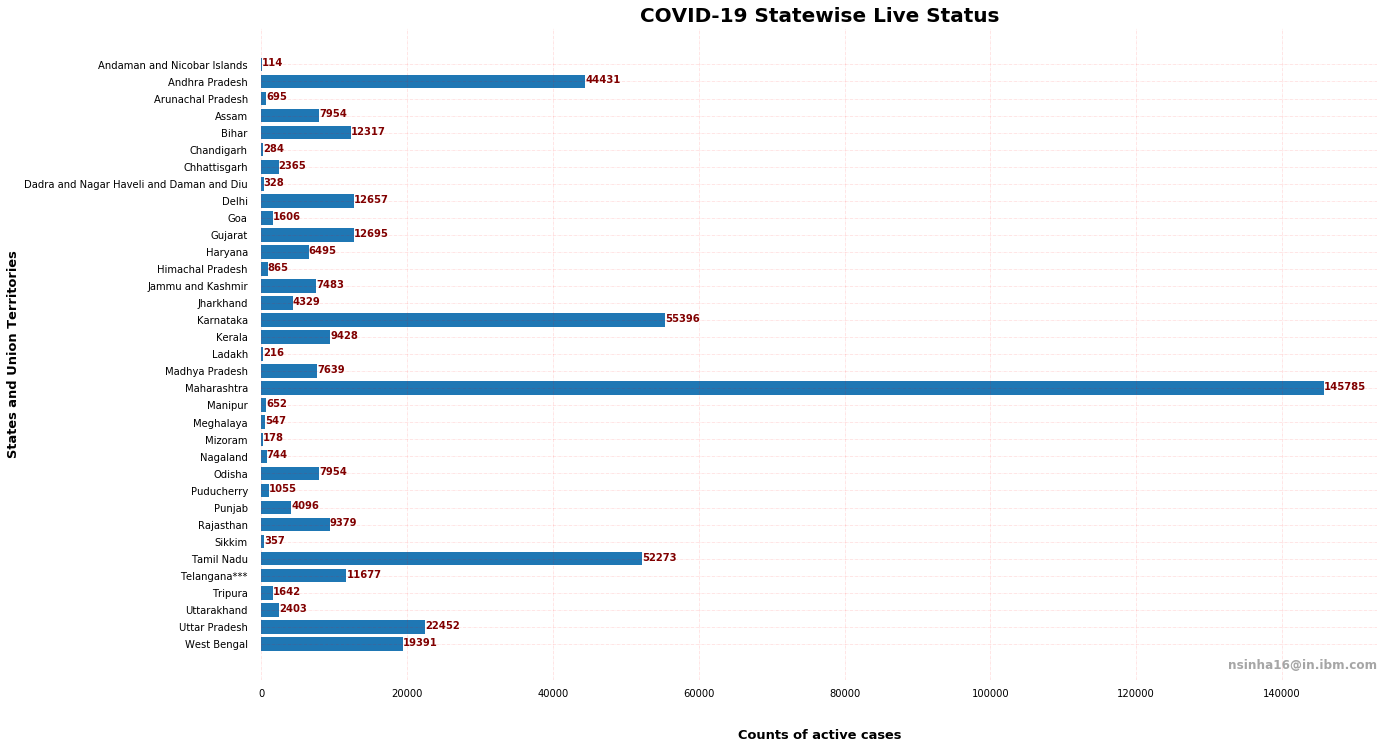

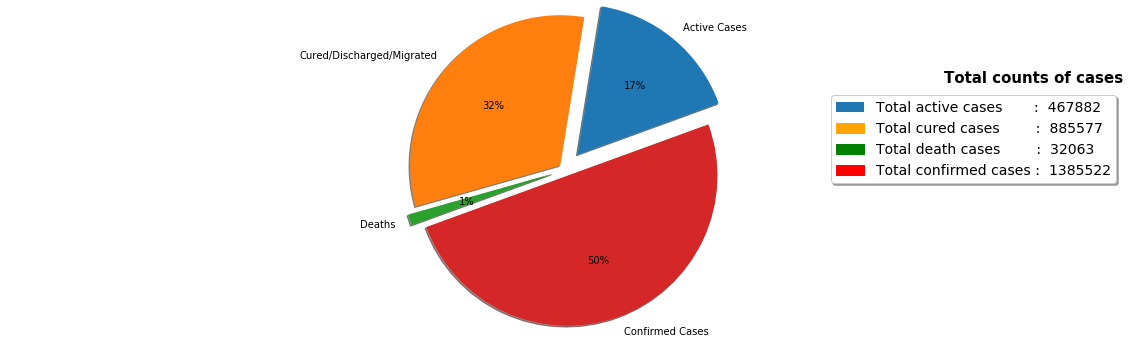

In [12]:
import matplotlib.patches as mpatches

states = df['Name of State / UT'].head(35) 
active_cases = df['Active Cases*'].head(35) 


#Bar plot figure Size 
fig, ax = plt.subplots(figsize = (20, 12)) 


#Used to display bar plot in sorted form 
df.sort_values('Active Cases*',inplace = True)


#Horizontal Bar Plot 
ax.barh(states, active_cases,align = 'center')  


#Remove axes splines (for bar graph border)
for s in ['top', 'bottom', 'left', 'right']: 
    ax.spines[s].set_visible(False) 

    
#Remove x, y Ticks 
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none') 


#Add padding between axes and labels 
ax.xaxis.set_tick_params(pad = 5) 
ax.yaxis.set_tick_params(pad = 10) 


#Add x, y gridlines 
ax.grid(b = True, color = 'red', linestyle = '-.', linewidth = 0.5, alpha = 0.2) 


#Show top values  
ax.invert_yaxis() 


#Add the labels to x and y axis
ax.set_xlabel('Counts of active cases', fontsize = 13, fontweight = 'bold', labelpad = 30)
ax.set_ylabel('States and Union Territories', fontsize = 13, fontweight = 'bold')
 
    
#Add annotation to bars 
for i in ax.patches: 
    plt.text(i.get_width()+0.5, i.get_y()+0.5, str(round((i.get_width()), 2)), 
             fontsize = 10, fontweight = 'bold', color ='maroon')

    
#Set the title of a bar graph
ax.set_title('COVID-19 Statewise Live Status', loc = 'center', fontsize = 20, fontweight = 'bold') 


#Add Text watermark 
fig.text(0.9, 0.15, 'nsinha16@in.ibm.com', fontsize = 12, fontweight = 'bold', color = 'grey', 
         ha = 'right', va = 'top', alpha = 0.7) 


plt.show()
print('\n')


#Lists to create pie chart
counts = [df['Active Cases*'][35],df['Cured/Discharged/Migrated*'][35],df['Deaths**'][35],df['Total Confirmed cases*'][35]]
name_of_counts = ['Active Cases','Cured/Discharged/Migrated','Deaths','Confirmed Cases']


#Pie plot figure Size 
fig, ax1 = plt.subplots(figsize=(20, 3), subplot_kw=dict(aspect="equal"))


#To give complete circle shape
ax1.axis('equal')


#Title of the pie chart
ax1.set_title('Total counts of cases', loc ='right',fontsize = 15, fontweight = 'bold') 


#Creating Pie chart
ax1.pie(counts, labels = name_of_counts, autopct = '%0.0f%%', radius = 2.3, shadow = True, explode = [0.3,0.1,0.2,0.1], 
        startangle = 20)


#Add legends
tot_active_cases = mpatches.Patch(label = 'Total active cases       :  {}'.format(df['Active Cases*'][35]))
tot_cured_cases = mpatches.Patch(label = 'Total cured cases        :  {}'.format(df['Cured/Discharged/Migrated*'][35]), 
                                 color ='orange')

tot_deaths = mpatches.Patch(label = 'Total death cases        :  {}'.format(df['Deaths**'][35]), color ='green')
tot_confirmed_cases = mpatches.Patch(label = 'Total confirmed cases :  {}'.format(df['Total Confirmed cases*'][35]), 
                                     color ='red')

plt.legend(handles=[tot_active_cases,tot_cured_cases,tot_deaths,tot_confirmed_cases], loc = 'upper right', 
           fontsize = 14, shadow=True)

plt.show()

Note : Data Visualization (Using Horizontal Bar and Pie Plots)

1. mpatches has been imported for customize legends.
2. barh() function is used to plot horizontal bar graph.
3. pie() function is used to plot pie chart.